# The following includes necessary imports for our regression and figures illustrating our data and findings.

In [1]:
import statsmodels.api as sm

In [2]:
from statsmodels.iolib.summary2 import summary_col

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [43]:
from numpy.polynomial.polynomial import polyfit

# The following sections' purpose is to access the data for our procedures. Data we will access includes the Effective Federal Funds Rate, Personal Savings Rate, and Real Gross Private Investment Data.

#### The following code is to access our Personal Savings Rate data. It will be accessed directly from Federal Reserve Economic Data (FRED).

In [12]:
url_savings = 'https://fred.stlouisfed.org/series/PSAVERT/downloaddata/PSAVERT.csv'
data_savings = pd.read_csv(url_savings, parse_dates=True)
data_savings.columns= ['Date','Personal Savings Rate']
data_savings.head()

,Date,Personal Savings Rate
0,1959-01-01,11.3
1,1959-02-01,10.6
2,1959-03-01,10.3
3,1959-04-01,11.2
4,1959-05-01,10.6


#### The following code is to access our Federal Funds Rate data. It will be accessed directly from Federal Reserve Economic Data (FRED).

In [13]:
url_fed = 'https://fred.stlouisfed.org/series/FEDFUNDS/downloaddata/FEDFUNDS.csv'
data_fed= pd.read_csv(url_fed, parse_dates=True)
data_fed.columns=['Date', 'Federal Funds Rate']
data_fed.head()

,Date,Federal Funds Rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


#### The following code is to access our Real Gross Private Investment data. It will be accessed directly from Federal Reserve Economic Data (FRED).

In [16]:
url_rgdp = 'https://fred.stlouisfed.org/series/GPDIC1/downloaddata/GPDIC1.csv'
data_rgdp = pd.read_csv(url_rgdp, parse_dates=True)
data_rgdp.columns=['Date', 'Real Gross Private Investment']
data_rgdp.head()

,Date,Real Gross Private Investment
0,1947-01-01,218.091
1,1947-04-01,201.386
2,1947-07-01,195.461
3,1947-10-01,233.284
4,1948-01-01,257.220


# The following sections' purpose is to provide description and tables for Effective Federal Funds Rate, Personal Savings Rate, and Real Gross Private Investment Data.

## Personal Savings Rate

In [18]:
data_savings.describe()

,Personal Savings Rate
count,748.000000
mean,8.991176
std,3.184577
min,2.200000
25%,6.775000
50%,8.700000
75%,11.300000
max,33.700000


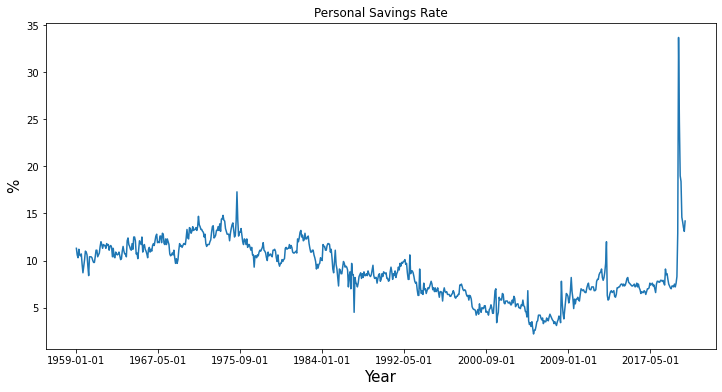

In [40]:
datasavings=data_savings.set_index('Date')
ax = datasavings['1950':'2021'].plot(title='Personal Savings Rate', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('%', fontsize=15)
plt.show()

## Federal Funds Rate

In [19]:
data_fed.describe()

,Federal Funds Rate
count,803.000000
mean,4.678344
std,3.613757
min,0.050000
25%,1.910000
50%,4.250000
75%,6.450000
max,19.100000


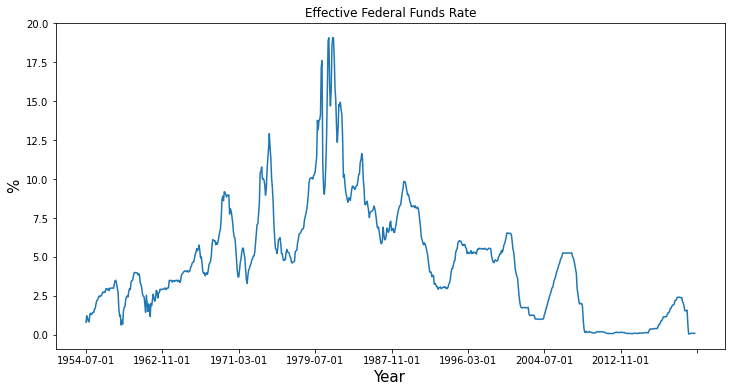

In [39]:
datafed=data_fed.set_index('Date')
ax = datafed['1950':'2021'].plot(title='Effective Federal Funds Rate', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('%', fontsize=15)
plt.show()

## Real Gross Private Investment

In [20]:
data_rgdp.describe()

,Real Gross Private Investment
count,297.000000
mean,1341.508360
std,984.607488
min,193.795000
25%,527.578000
50%,1108.328000
75%,2218.370000
max,3539.863000


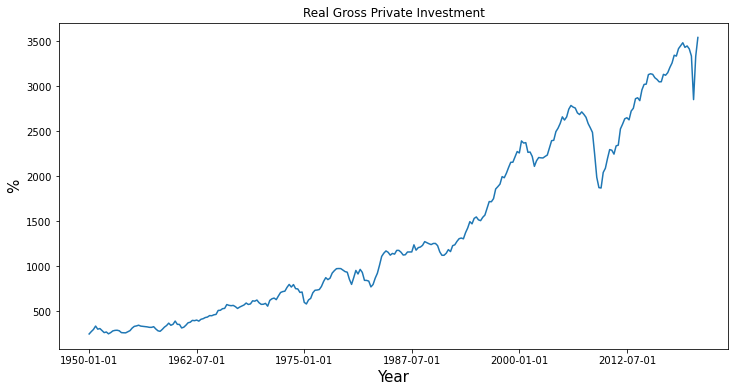

In [38]:
datargdp=data_rgdp.set_index('Date')
ax = datargdp['1950':'2021'].plot(title='Real Gross Private Investment', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('%', fontsize=15)
plt.show()

# Fed Fund Rate Correlation Analysis

### Fed Fund Rate and Personal Savings Rate

In [47]:
data_merge=pd.merge(data_savings, data_fed, how='inner', on='Date', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge.head()
data_merge.fillna(0)

,Date,Personal Savings Rate,Federal Funds Rate
0,1959-01-01,11.3,2.48
1,1959-02-01,10.6,2.43
2,1959-03-01,10.3,2.80
3,1959-04-01,11.2,2.96
4,1959-05-01,10.6,2.90
...,...,...,...
743,2020-12-01,14.2,0.09
744,2021-01-01,20.6,0.09
745,2021-02-01,14.7,0.08
746,2021-03-01,27.7,0.07


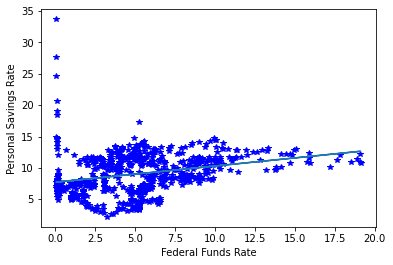

In [49]:
fig,ax=plt.subplots()
ax.plot(data_merge['Federal Funds Rate'],data_merge['Personal Savings Rate'],'b*')
ax.set_xlabel("Federal Funds Rate")
ax.set_ylabel("Personal Savings Rate")
b,m=polyfit(data_merge['Federal Funds Rate'],data_merge['Personal Savings Rate'],1)
ax.plot(data_merge['Federal Funds Rate'],b+m*data_merge['Federal Funds Rate'],'-')

### Fed Fund Rate and Real Gross Private Investment

In [50]:
data_merge2=pd.merge(data_rgdp, data_fed, how='inner', on='Date', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
data_merge2.head()
data_merge2.fillna(0)

,Date,Real Gross Private Investment,Federal Funds Rate
0,1954-07-01,272.037,0.80
1,1954-10-01,283.968,0.85
2,1955-01-01,312.337,1.39
3,1955-04-01,331.333,1.43
4,1955-07-01,336.418,1.68
...,...,...,...
262,2020-01-01,3333.963,1.55
263,2020-04-01,2849.792,0.05
264,2020-07-01,3329.625,0.09
265,2020-10-01,3539.863,0.09


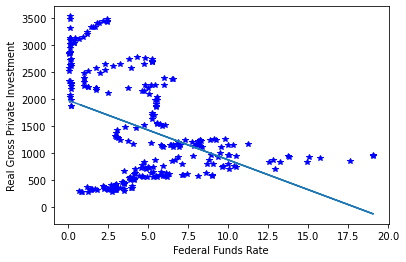

In [52]:
fig,ax=plt.subplots()
ax.plot(data_merge2['Federal Funds Rate'],data_merge2['Real Gross Private Investment'],'b*')
ax.set_xlabel("Federal Funds Rate")
ax.set_ylabel("Real Gross Private Investment")
b,m=polyfit(data_merge2['Federal Funds Rate'],data_merge2['Real Gross Private Investment'],1)
ax.plot(data_merge2['Federal Funds Rate'],b+m*data_merge2['Federal Funds Rate'],'-')